In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../src/silica_opt_insilico/')
from silica_opt_insilico import experiment, execute, data_processing, post_process, contour_animated
from saxs_data_processing import target_comparison
    
import numpy as np
import matplotlib.pyplot as plt

import pickle
import matplotlib.animation as animation
from IPython.display import HTML

## In silico optimization simulation

- objective functions work on volume fractions
- BO works on bounds/0-1


Ground truth:

- Diameter 80nm at [0.007, 0.018, 0.04]
- PDI min at [0.007, 0.025, 0.03]

## Parameters 

### SAXS Data processing parameters

### Experiment 'execution' parameters

In [2]:
# physical experiment bounds

teos_min_vf = 0.005
ammonia_min_vf = 0.005
water_min_vf = 0.005

teos_max_vf = 0.1
ammonia_max_vf = 0.1
water_max_vf = 0.15

noise_frac = 0.5 # what fraction of experimental noise to use

target_r_nm = 40 # particle size target

budget = 100

### Campaign structure 

### 2. Calculate scattering

In [3]:
# q range to consider up to and including spline fit step
q_min_subtract = 0.002
q_max_subtract = 0.035

# q range to interpolate spline fit on and perform distance metric calculation with
q_min_spl = 0.003
q_max_spl = 0.03
n_interpolate_gridpts = 1001 # number of grid points to interpolate q on.

In [4]:

target_r_angs = target_r_nm*10
target_pdi = 0.1
sld_silica = 8.575
sld_etoh = 9.611

In [5]:
q_grid = np.linspace(np.log10(q_min_spl), np.log10(q_max_spl), n_interpolate_gridpts)

q_grid_nonlog = 10**q_grid
target_I = target_comparison.target_intensities(q_grid_nonlog, target_r_angs, target_pdi, sld_silica, sld_etoh)
target_I = np.log10(target_I)

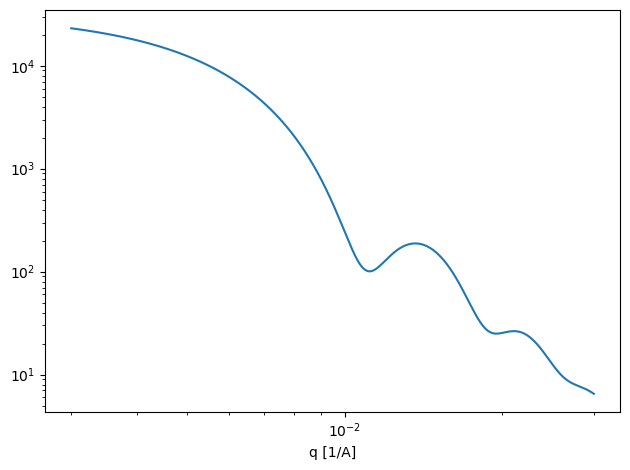

In [6]:
fig, ax = plt.subplots()
ax.loglog(10**q_grid, 10**target_I)
ax.set_xlabel('q [1/A]')

plt.tight_layout()


In [7]:
N_SAMPLES = q_grid.shape[0]

torch_optim_kwargs = {"n_iters":400, 
                "n_basis":15, 
                "n_layers":15,
                "domain_type":"linear",
                "basis_type":"palais",
                "n_restarts":15,
                "lr":1e-1,
                "n_domain":N_SAMPLES
                }

In [8]:
trials = {'baseline':{
            'batch_size':5,
            'amplitude_weight':0.1,
            'm_samples':5,
            'lower_bounds':[0.005, 0.005, 0.005], 
            'upper_bounds':[0.1, 0.1, 0.15], 
            'noise_level':0.05,
            'characterization':'SAXS',
            'distance':'apdist_torch'
        },
            'SobolBaseline':{
            'batch_size':0,
            'amplitude_weight':0.1,
            'm_samples':7,
            'lower_bounds':[0.005, 0.005, 0.005], 
            'upper_bounds':[0.1, 0.1, 0.15], 
            'noise_level':0.05,
            'characterization':'SAXS',
            'distance':'apdist_torch'
        },
    }

In [9]:
trials_noise = {'noise1':{
            'batch_size':5,
            'amplitude_weight':0.1,
            'm_samples':5,
            'lower_bounds':[0.005, 0.005, 0.005], 
            'upper_bounds':[0.1, 0.1, 0.15], 
            'noise_level':1,
            'characterization':'SAXS',
            'distance':'apdist_torch'
        },
    }

In [10]:
budget = 100

for trial_name, params in trials_noise.items():
    batch_size = params['batch_size']
    amplitude_weight = params['amplitude_weight']
    m_samples = params['m_samples']
    lower_bounds = params['lower_bounds']
    upper_bounds = params['upper_bounds']
    noise_level = params['noise_level']
    characterization = params['characterization']
    distance = params.get('distance', None)
    pdi_weight = params.get('pdi_weight', None)

    target_d = target_r_nm*2

    print(distance)

    execute.run_grouped_trials(target_I, q_grid, batch_size, amplitude_weight, m_samples, lower_bounds, upper_bounds, trial_name, noise_level, budget, target_d, target_pdi, characterization = characterization, distance_metric = distance, pdi_weight = pdi_weight, torch_optim_kwargs=torch_optim_kwargs)

apdist_torch
Running optimization for trial noise1
### Replicate 0 ###
starting initial samples
batch distance metric:  apdist_torch
n jobs:  -1
starting batch 1
Optimized acqf in 44.08416152000427 s
batch distance metric:  apdist_torch
n jobs:  -1
starting batch 2
Optimized acqf in 0.6574571132659912 s
batch distance metric:  apdist_torch
n jobs:  -1
starting batch 3
Optimized acqf in 1.9402732849121094 s
batch distance metric:  apdist_torch
n jobs:  -1
starting batch 4
Optimized acqf in 8.312171936035156 s
batch distance metric:  apdist_torch
n jobs:  -1
starting batch 5
Optimized acqf in 90.0775978565216 s
batch distance metric:  apdist_torch
n jobs:  -1
starting batch 6
Optimized acqf in 4.355250120162964 s
batch distance metric:  apdist_torch
n jobs:  -1
starting batch 7
Optimized acqf in 104.40268158912659 s
batch distance metric:  apdist_torch
n jobs:  -1
starting batch 8
Optimized acqf in 101.26263785362244 s
batch distance metric:  apdist_torch
n jobs:  -1
starting batch 9
Opt

/home/ubuntu/miniconda3/envs/botorch/lib/python3.12/site-packages/botorch/optim/optimize.py:568: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[NumericalWarning('A not p.d., added jitter of 1.0e-08 to the diagonal'), OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 2 and message ABNORMAL: .'), NumericalWarning('A not p.d., added jitter of 1.0e-08 to the diagonal')]
Trying again with a new set of initial conditions.
  return _optimize_acqf_batch(opt_inputs=opt_inputs)


Optimized acqf in 32.0358943939209 s
batch distance metric:  apdist_torch
n jobs:  -1
starting batch 5
Optimized acqf in 8.934281587600708 s
batch distance metric:  apdist_torch
n jobs:  -1
starting batch 6
Optimized acqf in 18.938992500305176 s
batch distance metric:  apdist_torch
n jobs:  -1
starting batch 7
Optimized acqf in 27.54561495780945 s
batch distance metric:  apdist_torch
n jobs:  -1
starting batch 8
Optimized acqf in 27.09527087211609 s
batch distance metric:  apdist_torch
n jobs:  -1
starting batch 9
Optimized acqf in 13.252180099487305 s
batch distance metric:  apdist_torch
n jobs:  -1
starting batch 10
Optimized acqf in 7.9064764976501465 s
batch distance metric:  apdist_torch
n jobs:  -1
starting batch 11
Optimized acqf in 18.590200662612915 s
batch distance metric:  apdist_torch
n jobs:  -1
starting batch 12
Optimized acqf in 26.239720344543457 s
batch distance metric:  apdist_torch
n jobs:  -1
starting batch 13
Optimized acqf in 134.46702098846436 s
batch distance me

In [12]:
trials_3

{'SobolBaseline': {'batch_size': 0,
  'amplitude_weight': 0.1,
  'm_samples': 7,
  'lower_bounds': [0.005, 0.005, 0.005],
  'upper_bounds': [0.1, 0.1, 0.15],
  'noise_level': 0.05,
  'characterization': 'SAXS',
  'distance': 'apdist_torch'}}